# Plot lidar acquisition dates
* Extract a small but representative subset of points from a LAZ tile
* Convert GpsTime values to UTC timestamps
* Make scatterplot using color to show date (day of year, decimal year, or days since acquisition start)

## Installations and imports

In [3]:
!pip install astropy

     |████████████████████████████████| 6.7 MB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 343 kB 6.7 MB/s eta 0:00:01


In [9]:
import astropy.time
import os.path

## Find the date range from file metadata (GpsTime field)

In [10]:
fname = "/Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8398_rp.laz"

In [4]:
!pdal info $fname

{
  "file_size": 157854990,
  "filename": "/Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8398_rp.laz",
  "now": "2021-09-13T10:27:45-0700",
  "pdal_version": "2.2.0 (git-version: Release)",
  "reader": "readers.las",
  "stats":
  {
    "bbox":
    {
      "EPSG:4326":
      {
        "bbox":
        {
          "maxx": -121.8572871,
          "maxy": 48.73864083,
          "maxz": 2473.640976,
          "minx": -121.8715555,
          "miny": 48.72920245,
          "minz": 1276.371336
        },
        "boundary": { "type": "Polygon", "coordinates": [ [ [ -121.871311657331518, 48.729202450872528, 1276.371336 ], [ -121.871555547156049, 48.73848045077969, 1276.371336 ], [ -121.857528467730845, 48.738640833440257, 2473.640976000000137 ], [ -121.857287075511209, 48.729362811095129, 2473.640976000000137 ], [ -121.871311657331518, 48.729202450872528, 1276.371336 ] ] ] }
      },
      "native":
      {
        "bbox":
        {
          "maxx": 1312630.82,
          "maxy": 124

In [1]:
min_gpstime = 124738100.5
max_gpstime = 125961460.6

### AstroPy converts GPSTime timestamps to UTC datetime

In [2]:
def gpstime_to_utc(gpstime):
    """Convert GpsTime from LAZ files to UTC timestamps using AstroPy"""
    return astropy.time.Time(10**9 + gpstime, format="gps").datetime

In [3]:
start_time = astropy.time.Time(10**9 + min_gpstime, format="gps")
start_time.datetime

NameError: name 'astropy' is not defined

In [13]:
end_time = astropy.time.Time(10**9 + max_gpstime, format="gps")
end_time.datetime

NameError: name 'max_gpstime' is not defined

## Use pdal decimation to keep only a small set of points
* Save these points as a GeoJSON or CSV file, not a raster
* Somehow the 

In [7]:
from test_pdal import run_pipeline

### Choose filename

In [8]:
fname = "/Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8398_rp.laz"

In [9]:
decimated_fn = os.path.basename(fname) + "_decimated.csv"

In [90]:
!pdal info --metadata $fname

{
  "file_size": 157854990,
  "filename": "/Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8398_rp.laz",
  "metadata":
  {
    "comp_spatialreference": "COMPD_CS[\"unknown\",PROJCS[\"NAD83 / Washington South\",GEOGCS[\"NAD83\",DATUM[\"North_American_Datum_1983\",SPHEROID[\"GRS 1980\",6378137,298.257222101,AUTHORITY[\"EPSG\",\"7019\"]],AUTHORITY[\"EPSG\",\"6269\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4269\"]],PROJECTION[\"Lambert_Conformal_Conic_2SP\"],PARAMETER[\"latitude_of_origin\",45.3333333333333],PARAMETER[\"central_meridian\",-120.5],PARAMETER[\"standard_parallel_1\",47.3333333333333],PARAMETER[\"standard_parallel_2\",45.8333333333333],PARAMETER[\"false_easting\",1640416.66666667],PARAMETER[\"false_northing\",0],UNIT[\"US survey foot\",0.304800609601219,AUTHORITY[\"9003\",\"EPSG\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH]],VERT_CS[\"unknown\",VERT_DATUM[\"unkno

In [10]:
pdal_decimate = [
    fname,
    {
        "type": "filters.decimation",
        "step": "1000000"
    },
    {
        "type": "writers.text",
        "format": "csv",
        "order": "X,Y,Z,GpsTime",
        "keep_unspecified": "false",
        "filename": decimated_fn
    }
]

In [11]:
run_pipeline(pdal_decimate)

1
(245,)


## Get CSV of acquisition dates for all Baker tiles

In [5]:
import glob

In [31]:
for fname in glob.glob("/Users/seth/Imagery/easton_area_lidar/baker_2015/laz/*"):
    print("Reading", fname)
    decimated_fn = os.path.basename(fname) + "_decimated.csv"
    print("Writing date samples to", decimated_fn)

    pdal_decimate = [
        fname,
        {
            "type": "filters.decimation",
            "step": "1000000"
        },
        {
            "type": "writers.text",
            "format": "csv",
            "order": "X,Y,Z,GpsTime",
            "keep_unspecified": "false",
            "filename": decimated_fn
        }
    ]

    run_pipeline(pdal_decimate)
    print("Wrote", decimated_fn)

Reading /Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8399_rp.laz
Writing date samples to 10UEU8399_rp.laz_decimated.csv
1
(24,)
Wrote 10UEU8399_rp.laz_decimated.csv
Reading /Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEV8300_rp.laz
Writing date samples to 10UEV8300_rp.laz_decimated.csv
1
(22,)
Wrote 10UEV8300_rp.laz_decimated.csv
Reading /Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8698_rp.laz
Writing date samples to 10UEU8698_rp.laz_decimated.csv
1
(31,)
Wrote 10UEU8698_rp.laz_decimated.csv
Reading /Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8497_rp.laz
Writing date samples to 10UEU8497_rp.laz_decimated.csv
1
(25,)
Wrote 10UEU8497_rp.laz_decimated.csv
Reading /Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8597_rp.laz
Writing date samples to 10UEU8597_rp.laz_decimated.csv
1
(20,)
Wrote 10UEU8597_rp.laz_decimated.csv
Reading /Users/seth/Imagery/easton_area_lidar/baker_2015/laz/10UEU8599_rp.laz
Writing date samples to 10UEU859

In [14]:
tile_dfs = []
for fname in glob.glob("10UEU*decimated.csv"):
    tile_df = pd.read_csv(fname)
    tile_df["Tile"] = fname.split(".")[0] # e.g. 10UEU8697_rp
    tile_dfs.append(tile_df)
full_easton_dates_df = pd.concat(tile_dfs)
full_easton_dates_df.sample(10)

,X,Y,Z,GpsTime,Tile
27,1320282.09,1245377.24,6047.34,1.259470e+08,10UEU8699_rp
23,1319415.16,1242357.78,5338.12,1.259479e+08,10UEU8698_rp
7,1320504.01,1239055.04,4773.69,1.247376e+08,10UEU8697_rp
3,1317586.43,1243896.41,5484.68,1.247373e+08,10UEU8598_rp
5,1322180.29,1246332.61,6371.16,1.247329e+08,10UEU8699_rp
18,1320026.81,1246920.28,6566.67,1.259461e+08,10UEU8699_rp
17,1317848.03,1243485.69,5390.65,1.259484e+08,10UEU8598_rp
22,1322259.45,1241194.92,5103.51,1.259487e+08,10UEU8697_rp
19,1320101.46,1244551.94,6050.26,1.259476e+08,10UEU8698_rp
7,1318437.31,1245171.21,5935.14,1.259471e+08,10UEU8599_rp


In [15]:
easton_dates_gdf = dates_gdf_from_df(full_easton_dates_df, "epsg:32610")
easton_dates_gdf.sample(3)


,X,Y,Z,GpsTime,Tile,geometry,UTCTime,day_of_year,time_since_first,days_since_first
11,1311225.59,1242805.57,4931.46,1.259602e+08,10UEU8398_rp,POINT (1311225.590 1242805.570),2015-09-10 22:43:09.666,253,15 days 02:35:44.676000,15
0,1312388.57,1244875.34,5528.31,1.247381e+08,10UEU8398_rp,POINT (1312388.570 1244875.340),2015-08-27 19:15:20.396,239,0 days 23:07:55.406000,0
13,1319005.62,1244041.41,5760.66,1.259479e+08,10UEU8598_rp,POINT (1319005.620 1244041.410),2015-09-10 19:18:18.234,253,14 days 23:10:53.244000,14


In [16]:
set(easton_dates_gdf.day_of_year)

{238, 239, 253}

In [57]:
easton_dates_gdf.to_csv("easton_area_laz_dates.csv")

Text(0.5, 1.0, 'Easton points - day of the year')

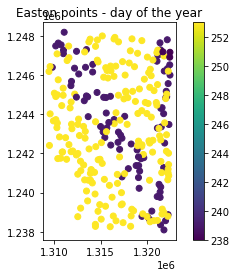

In [58]:
ax = easton_dates_gdf.plot(column="day_of_year", legend=True)

plt.title("Easton points - day of the year")

In [51]:
import geoviews.tile_sources

In [53]:
geoviews.tile_sources.EsriUSATopo * easton_dates_gdf

NotImplementedError: Iteration on Elements is not supported.

In [12]:
!ls -l *decimated*

-rw-r--r--@ 1 seth  staff    11537 Sep 13 10:29 10UEU8398_rp.laz_decimated.csv
-rw-r--r--@ 1 seth  staff   474570 Sep  8 13:40 10UEU8398_rp.laz_decimated.geojson
-rw-r--r--@ 1 seth  staff     2490 Sep  8 10:49 10UEU8398_rp.laz_decimated.tif
-rw-r--r--@ 1 seth  staff    10372 Sep  8 16:39 grand_mesa_sample_opentopography_points.laz_decimated.csv
-rw-r--r--@ 1 seth  staff  4319854 Sep  8 13:45 grand_mesa_sample_opentopography_points.laz_decimated.geojson
-rw-r--r--@ 1 seth  staff   227860 Sep  8 14:16 grand_mesa_sample_opentopography_points_cropped.laz_decimated.csv
-rw-r--r--@ 1 seth  staff   951022 Sep  8 13:59 grand_mesa_sample_opentopography_points_cropped.laz_decimated.geojson


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dates_gdf_from_df(df, crs):
    """Load a pandas DF of X,Y,GpsTime rows & produce a GeoDataFrame with additional columns for UTCTime datetime object and other time fields"""
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(df.X, df.Y))
    gdf["UTCTime"] = gdf["GpsTime"].apply(gpstime_to_utc)
    gdf["day_of_year"] = gdf["UTCTime"].dt.dayofyear
    gdf["time_since_first"] = gdf["UTCTime"] - gdf["UTCTime"].min() # for plotting
    gdf["days_since_first"] = gdf["time_since_first"].dt.days
    return gdf

### Read CSV, set geometry from X,Y,crs and convert GpsTime to UTC datetime

In [38]:
df = pd.read_csv(decimated_fn)#"grand_mesa_sample_opentopography_points.laz_decimated.csv")
gdf = dates_gdf_from_df(df, "epsg:32612")
# TODO save as CSV
#(gdf["GpsTime"])# + 10**9)
gdf.head()

,X,Y,Z,GpsTime,geometry,UTCTime,day_of_year,time_since_first,days_since_first
0,1319089.47,1241380.06,5113.12,1.247373e+08,POINT (1319089.470 1241380.060),2015-08-27 19:01:23.111,239,0 days 00:00:00,0
1,1317146.51,1242933.54,5233.46,1.247373e+08,POINT (1317146.510 1242933.540),2015-08-27 19:01:37.756,239,0 days 00:00:14.645000,0
2,1318920.72,1242179.40,5297.44,1.247373e+08,POINT (1318920.720 1242179.400),2015-08-27 19:01:27.042,239,0 days 00:00:03.931000,0
3,1317586.43,1243896.41,5484.68,1.247373e+08,POINT (1317586.430 1243896.410),2015-08-27 19:01:39.522,239,0 days 00:00:16.411000,0
4,1316444.38,1243732.22,5645.60,1.247376e+08,POINT (1316444.380 1243732.220),2015-08-27 19:06:43.222,239,0 days 00:05:20.111000,0


Text(0.5, 1.0, 'Day of the year')

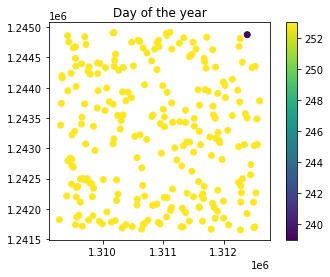

In [21]:
gdf.plot(column="day_of_year", legend=True)
plt.title("Day of the year")

Text(0.5, 1.0, 'Days since first point')

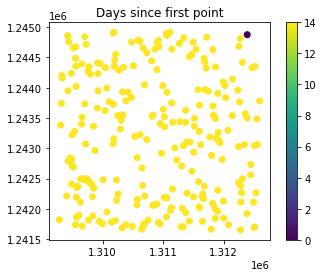

In [15]:
gdf.plot(column="days_since_first", legend=True)
plt.title("Days since first point")

In [7]:
!pdal info --metadata $fname

{
  "file_size": 31927709,
  "filename": "/Users/seth/Imagery/grand_mesa_sample_opentopography_points_cropped.laz",
  "metadata":
  {
    "comp_spatialreference": "PROJCS[\"WGS 84 / UTM zone 12N\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",0],PARAMETER[\"central_meridian\",-111],PARAMETER[\"scale_factor\",0.9996],PARAMETER[\"false_easting\",500000],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH],AUTHORITY[\"EPSG\",\"32612\"]]",
    "compressed": true,
    "count": 4952304,
    "creation_doy": 227,
    "creation_year": 2021,
    "dataformat_id": 3,
    "dataoffset": 535,
    "filesource_id": 0,
    "gl